2x2 Chessboard:
 [[1 2]
 [4 8]]

8x8 Chessboard:
 [[                  1                   2                   4
                    8                  16                  32
                   64                 128]
 [                256                 512                1024
                 2048                4096                8192
                16384               32768]
 [              65536              131072              262144
               524288             1048576             2097152
              4194304             8388608]
 [           16777216            33554432            67108864
            134217728           268435456           536870912
           1073741824          2147483648]
 [         4294967296          8589934592         17179869184
          34359738368         68719476736        137438953472
         274877906944        549755813888]
 [      1099511627776       2199023255552       4398046511104
        8796093022208      17592186044416      351843

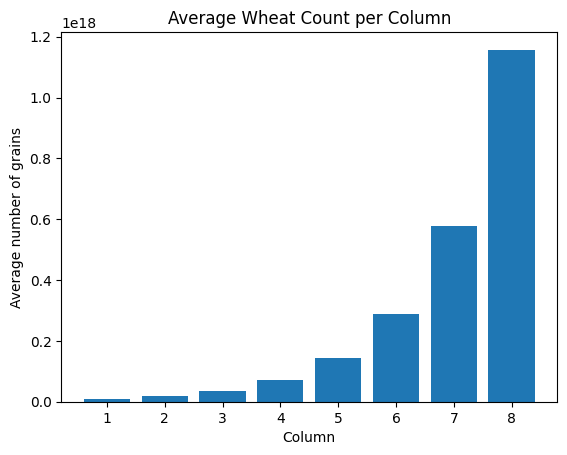

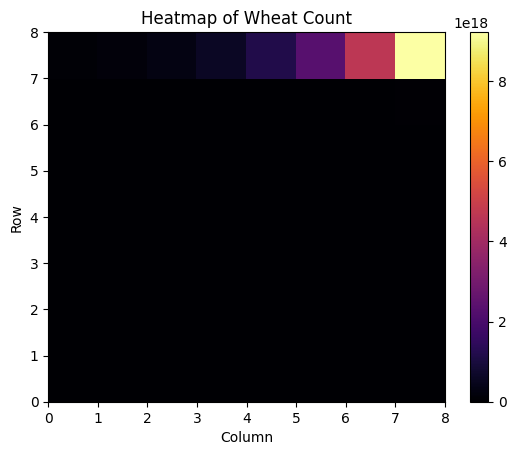


Ratio of second half to first half: 4294967296.0
3.64 μs ± 546 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
427 μs ± 43.1 μs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
3.2 μs ± 75.9 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


In [1]:
import numpy as np
import matplotlib.pyplot as plt

def create_chessboard(n, m):
    indices = np.arange(n * m, dtype=np.uint64).reshape(n, m)
    return 2**indices

# Question 1: 2x2 Chessboard
chessboard_2x2 = create_chessboard(2, 2)
print("2x2 Chessboard:\n", chessboard_2x2)

# Question 2: 8x8 Chessboard
chessboard_8x8 = create_chessboard(8, 8)
print("\n8x8 Chessboard:\n", chessboard_8x8)

# Question 3: Total number of wheat
total_wheat = chessboard_8x8.sum()
print("\nTotal wheat on 8x8 Chessboard:", total_wheat)

# Column-wise average and bar graph
column_avg = chessboard_8x8.mean(axis=0)
plt.xlabel("Column")
plt.ylabel("Average number of grains")
plt.title("Average Wheat Count per Column")
plt.bar(np.arange(1, 9), column_avg)
plt.show()

# Question 4: Heatmap
plt.xlabel("Column")
plt.ylabel("Row")
plt.title("Heatmap of Wheat Count")
plt.pcolor(chessboard_8x8, cmap='inferno')
plt.colorbar()
plt.show()

# Question 5: Second half vs First half ratio
first_half = chessboard_8x8[:4, :].sum()
second_half = chessboard_8x8[4:, :].sum()
ratio = second_half / first_half
print("\nRatio of second half to first half:", ratio)

# Question 6: Alternative methods

def create_chessboard_append(n, m):
    board = np.array([1], dtype=np.uint64)
    for _ in range(n * m - 1):
        board = np.append(board, 2 * board[-1])
    return board.reshape(n, m)

def create_chessboard_broadcast(n, m):
    indices = np.arange(n * m, dtype=np.uint64)
    return (2**indices).reshape(n, m)

chessboard_append = create_chessboard_append(8, 8)
chessboard_broadcast = create_chessboard_broadcast(8, 8)

# Question 7: Performance comparison
%timeit create_chessboard(8, 8)
%timeit create_chessboard_append(8, 8)
%timeit create_chessboard_broadcast(8, 8)